### Classification Model of Music Genre by Audio Features
- Reduce the dimension of the feature space in such a way that new variables are orthogonal to each other
- Source code: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- **Target Variable = Genre**

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data
%store -r beats2
%store -r genre_strings

beats2.head()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Genres
0,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,4.0,4
1,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,4.0,4
2,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,4.0,4
3,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,4.0,4
4,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,4.0,4


In [3]:
target_array = np.unique(genre_strings)
target_array

array(['Electronic', 'HipHop', 'Indie', 'Pop', 'RocknRoll'], dtype=object)

In [4]:
target_num_array = np.unique(beats2['Genres'])
target_num_array

array([0, 1, 2, 3, 4], dtype=int8)

## Learning
- Model Selection
    - Cross-Validation
    - Performance Metrics
    - Hyperparameter Optimization

In [6]:
# Import necessary modules
from sklearn.preprocessing import label_binarize

In [46]:
# Separate out the features
X = beats2.copy().drop(columns='Genres')

# Save feature column labels in list
feature_list = list(X.columns)

# Separate out the target
y = beats2['Genres'].values
print(y.shape)

# convert to binary variable
y_binary = label_binarize(y, classes=[0,1])[:,0]
print(y_binary.shape)

(79233,)
(79233,)


#### Testing and Training Data

In [33]:
# Import necessary modules 
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(55463, 23770, 55463, 23770)

#### Standardize the Feature Data

In [48]:
# Import necessary modules
from sklearn.preprocessing import StandardScaler

In [49]:
# Create a scaler instance
scaler = StandardScaler()

In [50]:
# Fit on training features set *only*
scaler.fit(X_train)

# Apply transform to both the feature training and the test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Show Training and Testing Data Set Shapes
print('Training (X) Features Shape:', X_train_scaled.shape)
print('Training (y) Target Shape:', y_train.shape)
print('Testing (X) Features Shape:', X_test_scaled.shape)
print('Testing (y) Target Shape:', y_test.shape)

Training (X) Features Shape: (55463, 13)
Training (y) Target Shape: (55463,)
Testing (X) Features Shape: (23770, 13)
Testing (y) Target Shape: (23770,)


#### Create a Random Decision Tree

In [52]:
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor

In [53]:
# Instantiate model with 100 decision trees and max depth of 3
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)

# Train the model on training data
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

*Make Predictions*

In [54]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test_scaled)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.24


In [55]:
# Predict for One Observation
print(rf.predict(X_test_scaled[0].reshape(1,-1)))

# Predict for One Observation
rf.predict(X_test_scaled[0:10])

[0.92890893]


array([0.92890893, 0.20429838, 0.09152889, 0.20429838, 0.09152889,
       0.09152889, 0.20429838, 0.09152889, 0.09152889, 0.15854359])

*Visualize Tree*

In [56]:
# Import necessary modules
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot

In [57]:
# Extract the small tree
tree_small = rf.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

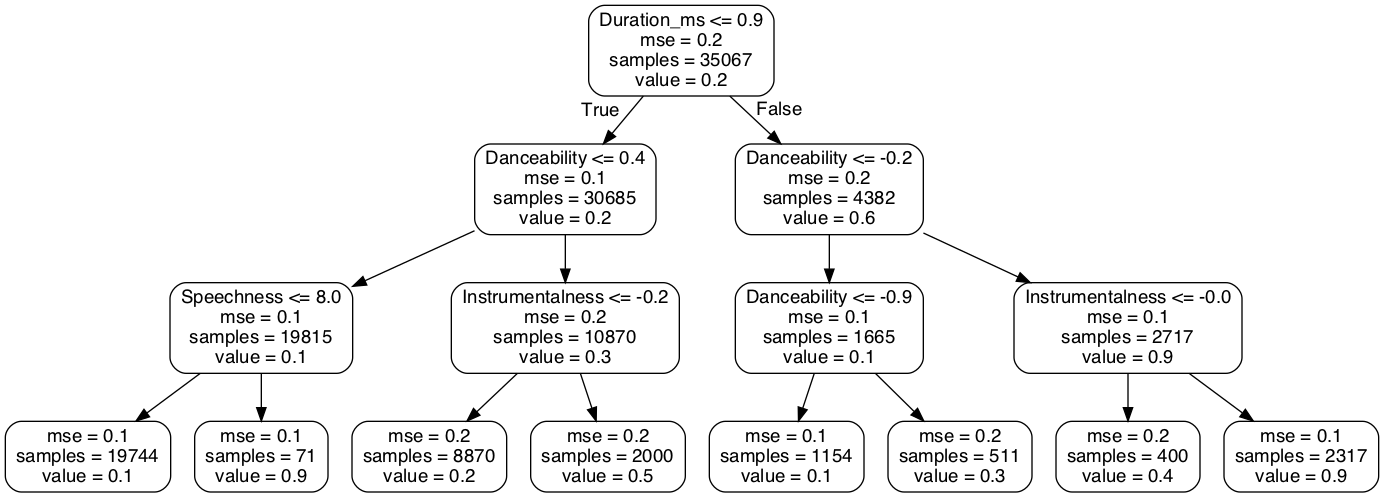

In [58]:
# Write graph to a png file
Image(graph.create_png())

*Observations*: According to this particular decision tree, 4 variables, 'Danceability', 'Speechness', 'Duration_ms', and 'Instrumentalness' were required to separate the genres with 24% error. Therefore, PCA should be used to help reduce dimensionality.

#### Create a PCA instance

In [59]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [60]:
# Make an instance of the Model with 4 principle components, as shown in the Decision Tree
ml_pca = PCA(n_components=4)

In [61]:
# Map (transform) to both the training set and the test set
X_train_scal_pca = ml_pca.fit_transform(X_train_scaled)
X_test_scal_pca = ml_pca.transform(X_test_scaled)

In [62]:
# Determine number of components in model
ml_pca.n_components_ 

4

In [64]:
# Define variable for variance - weights of PCA1 and PCA2
explained_pca = ml_pca.explained_variance_ratio_
pca1 = explained_pca[0]
pca2 = explained_pca[1]
pca3 = explained_pca[2]
pca4 = explained_pca[3]

print('Explained Variance Ratio:')
print('PCA1: ', pca1)
print('PCA2: ', pca2)
print('PCA3: ', pca3)
print('PCA4: ', pca4)

Explained Variance Ratio:
PCA1:  0.1898192615950804
PCA2:  0.1432218316474784
PCA3:  0.10041345335774848
PCA4:  0.09247432562329173


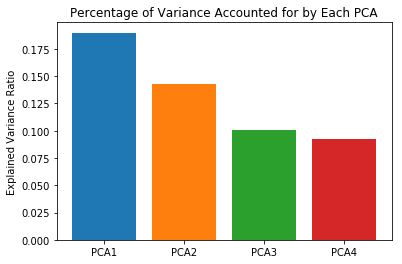

In [65]:
# View bar plot
fig, ax = plt.subplots()
x = np.arange(2)
pl1 = plt.bar(x=0, height=pca1)
pl2 = plt.bar(x=1, height=pca2)
pl3 = plt.bar(x=2, height=pca3)
pl4 = plt.bar(x=3, height=pca4)
# Define labels
plt.title('Percentage of Variance Accounted for by Each PCA')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(0, 4, 1), ('PCA1', 'PCA2', 'PCA3', 'PCA4'))
plt.show()

*Observations*: The 2 PCA analysis shows that the two top components have low variance rations (~19% and 14.3%, respectively), but when combined with the next two top components (~10% and 9.2%, repsectively), the top components have a combined explained variance ratio of ~52%. However, so simplicity, two principle components will be used for the logistic regression.

In [66]:
# Make an instance of the Model with 2 principle components
ml_pca2 = PCA(n_components=2)

# Map (transform) to both the training set and the test set
X_train_scal_pca2 = ml_pca2.fit_transform(X_train_scaled)
X_test_scal_pca2 = ml_pca2.transform(X_test_scaled)

#### Apply Logistic Regression using Gradient Descent to the Transformed Data

In [67]:
# Define subsets of target and feature training data
X_scal_pca2_train_01_subset = X_train_scal_pca2[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

print('Subset Training (X) Features Shape:', X_scal_pca2_train_01_subset.shape)
print('Subset Training (y) Target Shape:', y_train_01_subset.shape)

Subset Training (X) Features Shape: (55463, 2)
Subset Training (y) Target Shape: (55463,)


*Import Logistic Regression Class with Gradient Descent*

In [68]:
# Import necessary modules
%run gradient_logistic_regression.ipynb

In [69]:
# Create a logistic regression instance that uses gradient descent
log_reg_gd = LogisticRegressionGD(eta=0.5, n_iter=1000, random_state=42)

In [70]:
# Fit model to data
log_reg_gd.fit(X_scal_pca2_train_01_subset, y_train_01_subset)

*Visualize Decision Boundaries*

In [71]:
# Import necessary modules
from matplotlib.colors import ListedColormap
%run plot_decision_boundaries.ipynb

Text(0.5, 1.0, 'Logistic Regression using Gradient Descent of Music Genres using 2 PCA of Audio Features')

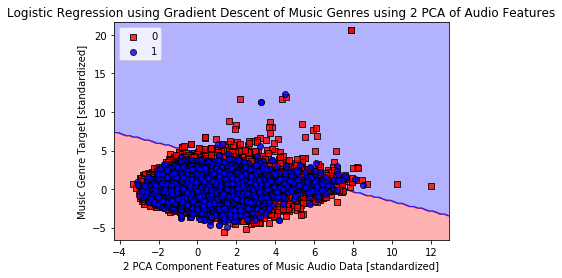

In [72]:
# Plot decision regions
plot_decision_regions(X=X_scal_pca2_train_01_subset, y=y_train_01_subset, classifier=log_reg_gd)
plt.xlabel('2 PCA Component Features of Music Audio Data [standardized]')
plt.ylabel('Music Genre Target [standardized]')
plt.legend(loc='upper left')
plt.title('Logistic Regression using Gradient Descent of Music Genres using 2 PCA of Audio Features')

*Observations*: As expected, since the 2 PCA analysis only accounts for low variance rations (~19% and ~14%, respectively), there is extensive overlap in the model.

#### Apply scikit-learn Logistic Regression to the Transformed Data

In [73]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression

In [101]:
# Create a logreg instance with a hyperparameter of 100
logreg = LogisticRegression(C=100, random_state=42, solver='lbfgs', multi_class='ovr')

# Fit training data to model
logreg2 = logreg.fit(X_train_scal_pca2, y_train) # 2 PCA

*Visualize Decision Boundaries*

Text(0.5, 1.0, 'scikit Logistic Regression of Music Genres using 2 PCA of Audio Features')

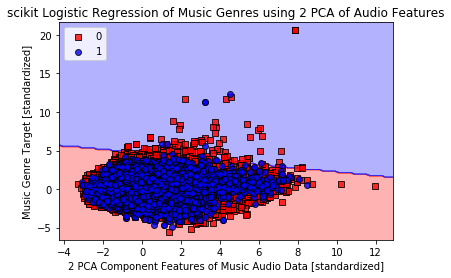

In [75]:
# Plot decision regions

# 2 PCA analysis
plot_decision_regions(X=X_train_scal_pca2, y=y_train, classifier=logreg2)
plt.xlabel('2 PCA Component Features of Music Audio Data [standardized]')
plt.ylabel('Music Genre Target [standardized]')
plt.legend(loc='upper left')
plt.title('scikit Logistic Regression of Music Genres using 2 PCA of Audio Features')

In [77]:
logreg2.score(X_train_scal_pca2, y_train)

0.7819266898653157

*Observations*: There **still appears to be too much dimensionality** to clearly isolate Genres by music audio features. However, the model does have an **accuracy score of ~78%** the training data. However, cross validation needs to be assessed prior to assuming that this model will accurately perform on unseen data.

#### Apply Cross Validation of Score

In [79]:
# Import necessary modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [80]:
# Build the k-fold cross-validator with 5 splits
kfold = KFold(n_splits=5, random_state=42)

In [81]:
# Assess cross validation of logreg2 on training data
result = cross_val_score(logreg2, X_train_scal_pca2, y_train, cv=kfold, scoring='accuracy')
result.mean()

0.781944780594605

*Observations*: This **model appears to be consistently predicting music genre for 78% of the data**. To further increase the accuracy of this model, this high-dimensional data can be converted to low-dimensional codes by training a multilayer neural network with a small central layer to reconstruct high-dimensional input vectors. However, for the sake of time and marginal impact of this project, **Hyperparameters will be added to the model followed by an ROC plotting of the model**.

#### Adding Hyperparameters to Increase Model Accuracy
- code source: https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models

In [96]:
# Import necessary modules
from sklearn.model_selection import RandomizedSearchCV

In [106]:
# Define a random grid of hyperparameters
dual=[False,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [108]:
# Define a random search of hyperparameters
random = RandomizedSearchCV(estimator=logreg2, param_distributions=param_grid, cv=3, n_jobs=-1)
random_result = random.fit(X_train_scal_pca2, y_train)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.781873 using {'max_iter': 140, 'dual': False, 'C': 1.5}


#### Create a new logisitc regression instance with optimal hyperparameters

In [109]:
# Create a logreg instance with a hyperparameter of 11.5
optimal_logreg = LogisticRegression(C=1.5, random_state=42, solver='lbfgs', multi_class='ovr', max_iter=140)

# Fit training data to model
optimal_logreg = optimal_logreg.fit(X_train_scal_pca2, y_train) # 2 PCA

#### Test Model Percision with ROC curve and Accuracy Score

In [110]:
# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [111]:
# Predict
test_prediction = optimal_logreg.predict(X_test_scal_pca2)

# Calculate the probability of model's ability to predict a likely value of the features
test_prediction_probability = optimal_logreg.predict_proba(X_test_scal_pca2)[:,1]

# Compute classification report (https://en.wikipedia.org/wiki/Precision_and_recall)
class_report = classification_report(y_test, test_prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     18749
           1       0.07      0.00      0.00      5021

   micro avg       0.79      0.79      0.79     23770
   macro avg       0.43      0.50      0.44     23770
weighted avg       0.64      0.79      0.69     23770



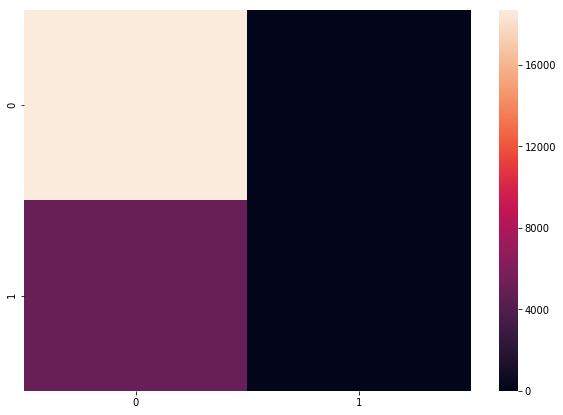

In [112]:
# Compute the confusion_matrix to evaluate the accuracy of a classification
conf_matrix = confusion_matrix(y_test, test_prediction)

# Plot confusion_matrix
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix)

In [114]:
# Print the accuracy from the testing data
'The accuracy score the scaled testing data is: ', accuracy_score(y_test, test_prediction)

('The accuracy score the scaled testing data is: ', 0.785990744636096)

In [115]:
# Calculate ROC accuracy score
logit_roc_auc = roc_auc_score(y_test, optimal_logreg.predict(X_test_scal_pca2))

# Calculate True Positive and False Positive rates
false_pr, true_pr, thresholds = roc_curve(y_test, optimal_logreg.predict_proba(X_test_scal_pca2)[:,1])

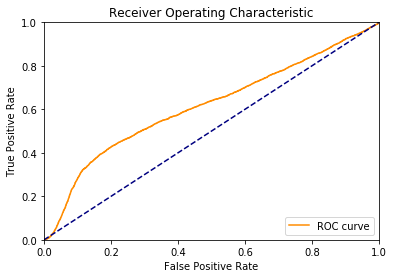

In [116]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(false_pr, true_pr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Conclusion**: This logistic regression model was successfully able to predict music genre based off of the audio features found in the dataset with 78% accuracy. Further investigation and modification of this model is necessary in order to prove if the audio features in this dataset are truly indicative of the song, to prove that audio feature extraction of the songs is can be consistently repeated, and finally, a neural network featuring several layers of classification and modification will further the accuracy of this model in order to create a real-time predictive model.